In [1]:
%load_ext autoreload
%autoreload 2

In [49]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import warnings; warnings.simplefilter('ignore')
import sys
import h5py
import pandas as pd
import seaborn as sns
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_ancillary
import jsm_visualize
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models
import evolve as ev
import galhalo as gh
import profiles as profiles
import config as cfg
import orbit as orb
from astropy import units as u
from scipy.stats import binned_statistic_2d

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Conversion functions
def log1pz_to_z(y):
    return 10**y - 1

def z_to_log1pz(z):
    return np.log10(1 + z)

In [4]:
plt.style.use('../../SatGen/notebooks/paper1/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches
levelz = [1-0.99, 1-0.95, 1-0.68]

In [5]:
S0 = jsm_ancillary.load_sample("../../StellarHalo/data/fiducial/S0_sample.h5")

In [19]:
sorted_S0 = S0.sort_values("host_z50")
sorted_z50 = sorted_S0["host_z50"]

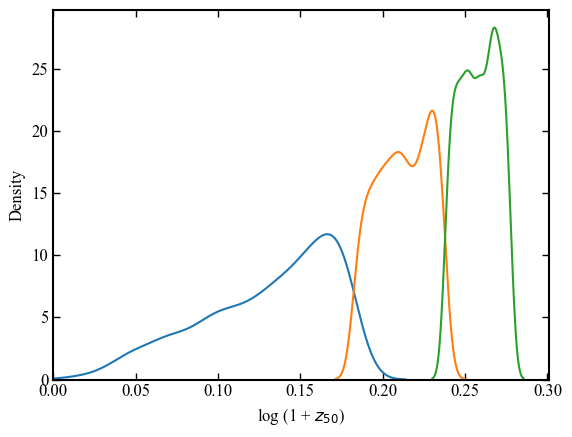

In [ ]:
sns.kdeplot(z_to_log1pz(sorted_z50[0:1000]))
sns.kdeplot(z_to_log1pz(sorted_z50[1000:2000]))
sns.kdeplot(z_to_log1pz(sorted_z50[2000:3000])) 

plt.xlim(0) 
plt.xlabel("log (1 + $z_{\\rm 50}$)")
plt.show()

In [140]:
sat_mass= jsm_ancillary.make_matrix(sorted_S0, "sat_mass")
sat_fates = jsm_ancillary.make_matrix(sorted_S0, "sat_fates")
sat_zacc = jsm_ancillary.make_matrix(sorted_S0, "sat_zacc")
sat_order = jsm_ancillary.make_matrix(sorted_S0, "sat_acc_order")

sat_iacc = jsm_ancillary.make_matrix(sorted_S0, "sat_iacc")
sat_ifin = jsm_ancillary.make_matrix(sorted_S0, "sat_ifinal")

In [141]:
withering_mask = sat_mass > 6.75*10**9
surviving_mask = sat_fates == 1

In [142]:
sat_zacc_masked = np.where(withering_mask & surviving_mask, sat_zacc, np.nan)

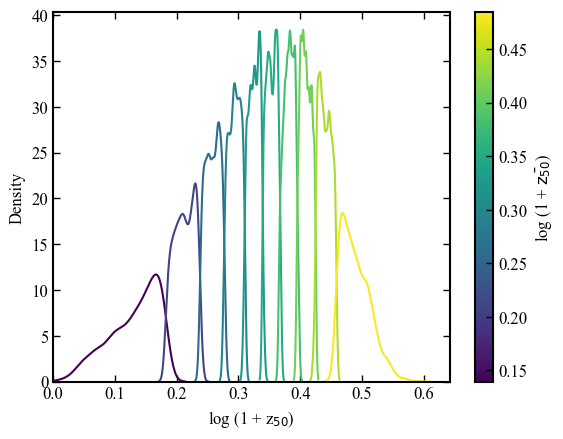

In [143]:
chunk_size = 1000

fig, ax = plt.subplots()

# Compute medians first
medians = []
for i in range(0, len(sorted_z50), chunk_size):
    med = np.median(z_to_log1pz(sorted_z50[i:i+chunk_size]))
    medians.append(med)

medians = np.array(medians)

# Colormap normalization
norm = mpl.colors.Normalize(vmin=medians.min(), vmax=medians.max())
cmap = mpl.cm.viridis

# Plot each chunk
for i, med in zip(range(0, len(sorted_z50), chunk_size), medians):
    color = cmap(norm(med))
    ax = sns.kdeplot(
        z_to_log1pz(sorted_z50[i:i+chunk_size]),
        ax=ax,
        color=color
    )

# Colorbar
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # required for matplotlib < 3.7
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("log (1 + $\\bar{\\rm z_{\\rm 50}}$)")

ax.set_xlim(left=0)
ax.set_xlabel("log (1 + z$_{\\rm 50}$)")

plt.show()

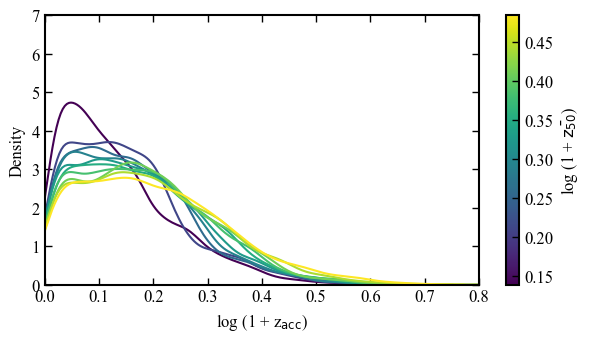

In [144]:
fig, ax = plt.subplots(figsize=(double_textwidth, single_textwidth))

# --- Plot sat_zacc distributions using SAME colors ---
for i, med in zip(range(0, len(sorted_z50), chunk_size), medians):
    
    color = cmap(norm(med))
    
    sns.kdeplot(
        z_to_log1pz(
            sat_zacc_masked[i:i+chunk_size].flatten()
        ),
        ax=ax,
        color=color
    )

# --- Colorbar ---
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("log (1 + $\\bar{\\rm z_{\\rm 50}}$)")

ax.set_xlim(0, 0.8)
ax.set_ylim(0, 7)

ax.set_xlabel("log (1 + z$_{\\rm acc}$)")
plt.show()